<a href="https://colab.research.google.com/github/Wfuller25/Business-Appl-of-Python/blob/main/NetflixMovies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [ ]:
# # Importing pandas and matplotlib
# import pandas as pd
# import matplotlib.pyplot as plt

# # Read in the Netflix CSV as a DataFrame
# netflix_df = pd.read_csv("netflix_data.csv")

In [5]:
import pandas as pd
import requests
from io import StringIO

orig_url='https://drive.google.com/file/d/1vKlIPmTfaMh11_YjKdFcfia7qfF4K9Y8/view?usp=sharing' # share link to data set

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text

csv_raw = StringIO(url)
netflix_df = pd.read_csv(csv_raw)
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


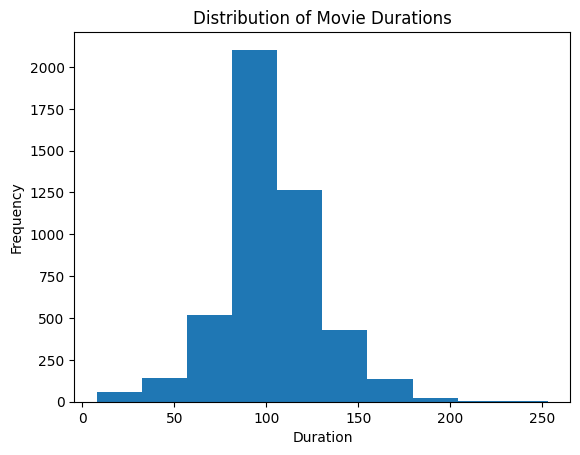

Number of short movies: 7


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming netflix_df is already defined and loaded with data
# Filter the dataframe for movies
movies_df = netflix_df[netflix_df["type"] == "Movie"]

# Filter the dataframe for movies released in the 90s
nineties = movies_df[np.logical_and(movies_df["release_year"] >= 1990, movies_df["release_year"] <= 1999)]
nineties_action = nineties[nineties["genre"].str.contains("Action", case=False, na=False)]
# Plot histogram of movie durations
plt.hist(movies_df["duration"])
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Durations')
plt.show()
duration = nineties["duration"].mode()[0]
# Count short movies

short_movie_count = nineties_action[nineties_action["duration"] < 90].shape[0]
short_movie_count = 0
for index, row in nineties_action.iterrows():
    if row["duration"] < 90:
        short_movie_count += 1

print(f"Number of short movies: {short_movie_count}")